In [367]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [368]:
networksize_df = pd.read_csv('datasets/networksize-2021-12-27-2022-05-28.csv', skiprows=5)
networksize_df.head(5)

,date,relays,bridges
0,2021-12-27,6637,2124
1,2021-12-28,6660,2136
2,2021-12-29,6694,2166
3,2021-12-30,6685,2213
4,2021-12-31,6681,2223


In [369]:
daily_bridge_users_df = pd.read_csv('datasets/mean_daily_bridge_users_country.csv')
daily_bridge_users_df.set_index('Month', inplace=True)
daily_bridge_users_df.head()

,Russia,United States,Germany,Iran,France,United Kingdom,Netherlands,China
Month,,,,,,,,
2021/12,30180,6825,3269,3121,1277,1634,1869,1573
2022/01,35046,7381,3464,2929,2076,1826,1671,1384
2022/02,32230,6704,3260,2368,1849,1800,1772,1362
2022/03,43160,7736,3330,1974,2463,1621,1915,1629
2022/04,36552,7100,2794,1989,1927,1429,1491,1678


In [370]:
population_size_df = pd.read_csv('datasets/population_size_2022.csv')

<AxesSubplot:xlabel='Month'>

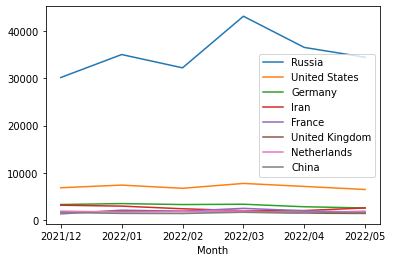

In [371]:
daily_bridge_users_df.plot()

In [372]:
bridge_users_adjusted_by_country_population = pd.DataFrame()

In [373]:

bridge_users_adjusted_by_country_population = pd.DataFrame()
for col in daily_bridge_users_df:
  bridge_users_adjusted_by_country_population = pd.concat([bridge_users_adjusted_by_country_population, daily_bridge_users_df[col].div(population_size_df[col][0])], axis=1)
bridge_users_adjusted_by_country_population

,Russia,United States,Germany,Iran,France,United Kingdom,Netherlands,China
2021/12,0.000207,0.000020,0.000039,0.000036,0.000019,0.000024,0.000109,1.086315e-06
2022/01,0.000240,0.000022,0.000041,0.000034,0.000032,0.000027,0.000097,9.557911e-07
2022/02,0.000221,0.000020,0.000039,0.000028,0.000028,0.000026,0.000103,9.405979e-07
2022/03,0.000296,0.000023,0.000040,0.000023,0.000038,0.000024,0.000111,1.124988e-06
2022/04,0.000251,0.000021,0.000033,0.000023,0.000029,0.000021,0.000087,1.158828e-06
2022/05,0.000236,0.000019,0.000030,0.000030,0.000025,0.000020,0.000109,1.063525e-06


<AxesSubplot:>

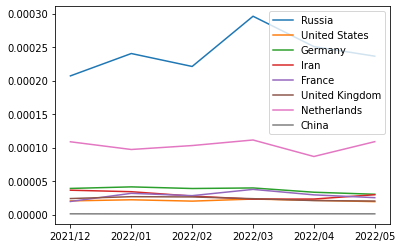

In [374]:
bridge_users_adjusted_by_country_population.plot()

In [375]:
daily_bridge_users_ru_df = pd.read_csv('datasets/userstats-bridge-country-2021-12-27-ru-2022-05-28.csv')
daily_bridge_users_ru_df = daily_bridge_users_ru_df.pivot(index='date', 
                      columns='country', 
                      values=['users'])
daily_bridge_users_ru_df.head()

,users
country,ru
date,
2021-12-27,36346
2021-12-28,37086
2021-12-29,36549
2021-12-30,37017
2021-12-31,36936


In [376]:
daily_bridge_users_ua_df = pd.read_csv('datasets/userstats-bridge-country-2021-12-27-ua-2022-05-28.csv')
daily_bridge_users_ua_df = daily_bridge_users_ua_df.pivot(index='date', 
                      columns='country', 
                      values=['users'])
daily_bridge_users_ua_df.head()

,users
country,ua
date,
2021-12-27,653
2021-12-28,642
2021-12-29,711
2021-12-30,656
2021-12-31,643


In [377]:
daily_bridge_users_ir_df = pd.read_csv('datasets/userstats-bridge-country-2021-12-27-ir-2022-05-28.csv')
daily_bridge_users_ir_df = daily_bridge_users_ir_df.pivot(index='date', 
                      columns='country', 
                      values=['users'])
daily_bridge_users_ir_df.head()

,users
country,ir
date,
2021-12-27,3179
2021-12-28,3230
2021-12-29,3229
2021-12-30,2733
2021-12-31,3058


In [378]:
daily_bridge_users_all_df = pd.read_csv('datasets/userstats-bridge-country-2021-12-27-all-2022-05-28.csv')
daily_bridge_users_all_df['country'].fillna('all', inplace=True)
daily_bridge_users_all_df = daily_bridge_users_all_df.pivot(index='date', 
                      columns='country', 
                      values=['users'])
daily_bridge_users_all_df.head()

,users
country,all
date,
2021-12-27,78588
2021-12-28,80154
2021-12-29,81248
2021-12-30,78933
2021-12-31,78528


In [379]:
daily_relay_users_ru_df = pd.read_csv('datasets/userstats-relay-country-2021-12-27-ru-2022-05-28-off.csv')
daily_relay_users_ru_df = daily_relay_users_ru_df.pivot(index='date', 
                      columns='country', 
                      values=['users'])
daily_relay_users_ru_df.head()

,users
country,ru
date,
2021-12-27,188788
2021-12-28,188408
2021-12-29,188505
2021-12-30,185934
2021-12-31,179789


In [380]:
daily_relay_users_ua_df = pd.read_csv('datasets/userstats-relay-country-2021-12-27-ua-2022-05-28-off.csv')
daily_relay_users_ua_df = daily_relay_users_ua_df.pivot(index='date',
                      columns='country', 
                      values=['users'])
daily_relay_users_ua_df.head()

,users
country,ua
date,
2021-12-27,41357
2021-12-28,41962
2021-12-29,42154
2021-12-30,39507
2021-12-31,37774


In [381]:
daily_relay_users_ir_df = pd.read_csv('datasets/userstats-relay-country-2021-12-27-ir-2022-05-28-off.csv')
daily_relay_users_ir_df.head()
daily_relay_users_ir_df = daily_relay_users_ir_df.pivot(index='date', 
                      columns='country', 
                      values=['users'])
daily_relay_users_ir_df

,users
country,ir
date,
2021-12-27,11851
2021-12-28,11904
2021-12-29,11558
2021-12-30,10859
2021-12-31,10576
...,...
2022-05-21,11659
2022-05-22,11504


In [382]:
daily_relay_users_all_df = pd.read_csv('datasets/userstats-relay-country-2021-12-27-all-2022-05-28-off.csv')
daily_relay_users_all_df.head()
daily_relay_users_all_df['country'].fillna('all', inplace=True)
daily_relay_users_all_df = daily_relay_users_all_df.pivot(index='date', 
                      columns='country', 
                      values=['users'])
                      

In [383]:
daily_bridge_users_df = pd.concat([daily_bridge_users_all_df, daily_bridge_users_ru_df, daily_bridge_users_ua_df, daily_bridge_users_ir_df, ], axis=1)
daily_bridge_users_df

users                   
country       all     ru    ua    ir
date                                
2021-12-27  78588  36346   653  3179
2021-12-28  80154  37086   642  3230
2021-12-29  81248  36549   711  3229
2021-12-30  78933  37017   656  2733
2021-12-31  78528  36936   643  3058
...           ...    ...   ...   ...
2022-05-21  70625  35473   959  2167
2022-05-22  71623  35968   936  2133
2022-05-23  71856  35095  1041  2116
2022-05-24  71296  36885   999  1901
2022-05-25  72251  34811  1020  2131

[150 rows x 4 columns]

In [384]:
daily_relay_users_df = pd.concat([daily_relay_users_all_df, daily_relay_users_ru_df, daily_relay_users_ua_df, daily_relay_users_ir_df, ], axis=1)
daily_relay_users_df

users                      
country         all      ru     ua     ir
date                                     
2021-12-27  2582025  188788  41357  11851
2021-12-28  2487691  188408  41962  11904
2021-12-29  2496662  188505  42154  11558
2021-12-30  2475604  185934  39507  10859
2021-12-31  2352201  179789  37774  10576
...             ...     ...    ...    ...
2022-05-21  2979390  105156  37308  11659
2022-05-22  2868764  106178  36490  11504
2022-05-23  2740249  110308  37653  10909
2022-05-24  2745070  109437  35871  10561
2022-05-25  3204463  117658  38280  10776

[149 rows x 4 columns]

In [385]:
daily_relay_users_df = daily_relay_users_df.reset_index()
daily_relay_users_df.groupby(pd.PeriodIndex(daily_relay_users_df['date'], freq="M")).mean().round()

users                            
country        all        ru       ua       ir
date                                          
2021-12  2478837.0  186285.0  40551.0  11350.0
2022-01  2446617.0  172932.0  39304.0  11437.0
2022-02  2462644.0  151608.0  57138.0  11231.0
2022-03  2348763.0  131300.0  56912.0  10223.0
2022-04  2349579.0  100937.0  38828.0   9867.0
2022-05  2566775.0  100884.0  37121.0  10196.0

In [386]:
daily_bridge_users_df = daily_bridge_users_df.reset_index()
daily_bridge_users_df.groupby(pd.PeriodIndex(daily_bridge_users_df['date'], freq="M")).mean().round()

users                        
country      all       ru     ua      ir
date                                    
2021-12  79490.0  36787.0  661.0  3086.0
2022-01  76091.0  35046.0  696.0  2929.0
2022-02  70881.0  32230.0  766.0  2368.0
2022-03  83323.0  43160.0  915.0  1974.0
2022-04  73076.0  36552.0  837.0  1989.0
2022-05  69987.0  34470.0  977.0  2128.0